In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [27]:
# 데이터 불러오기
bike_df =  pd.read_csv(f'data/bike_train.csv', encoding='cp949')    #TODO:YOUR_CODE_HERE
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [28]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [29]:
# 문자열을 datetime 타입으로 변경. - (Dtype이 object 여서 나누기 위해서 형변환을 함)
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
# 일 추출 
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
# 시간 추출
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [30]:
# 중복 컬럼 제거하기 
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [31]:
bike_df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


In [32]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,23.000000


In [33]:
# 시각화하기
# 조건에 따른 대여량 시각화

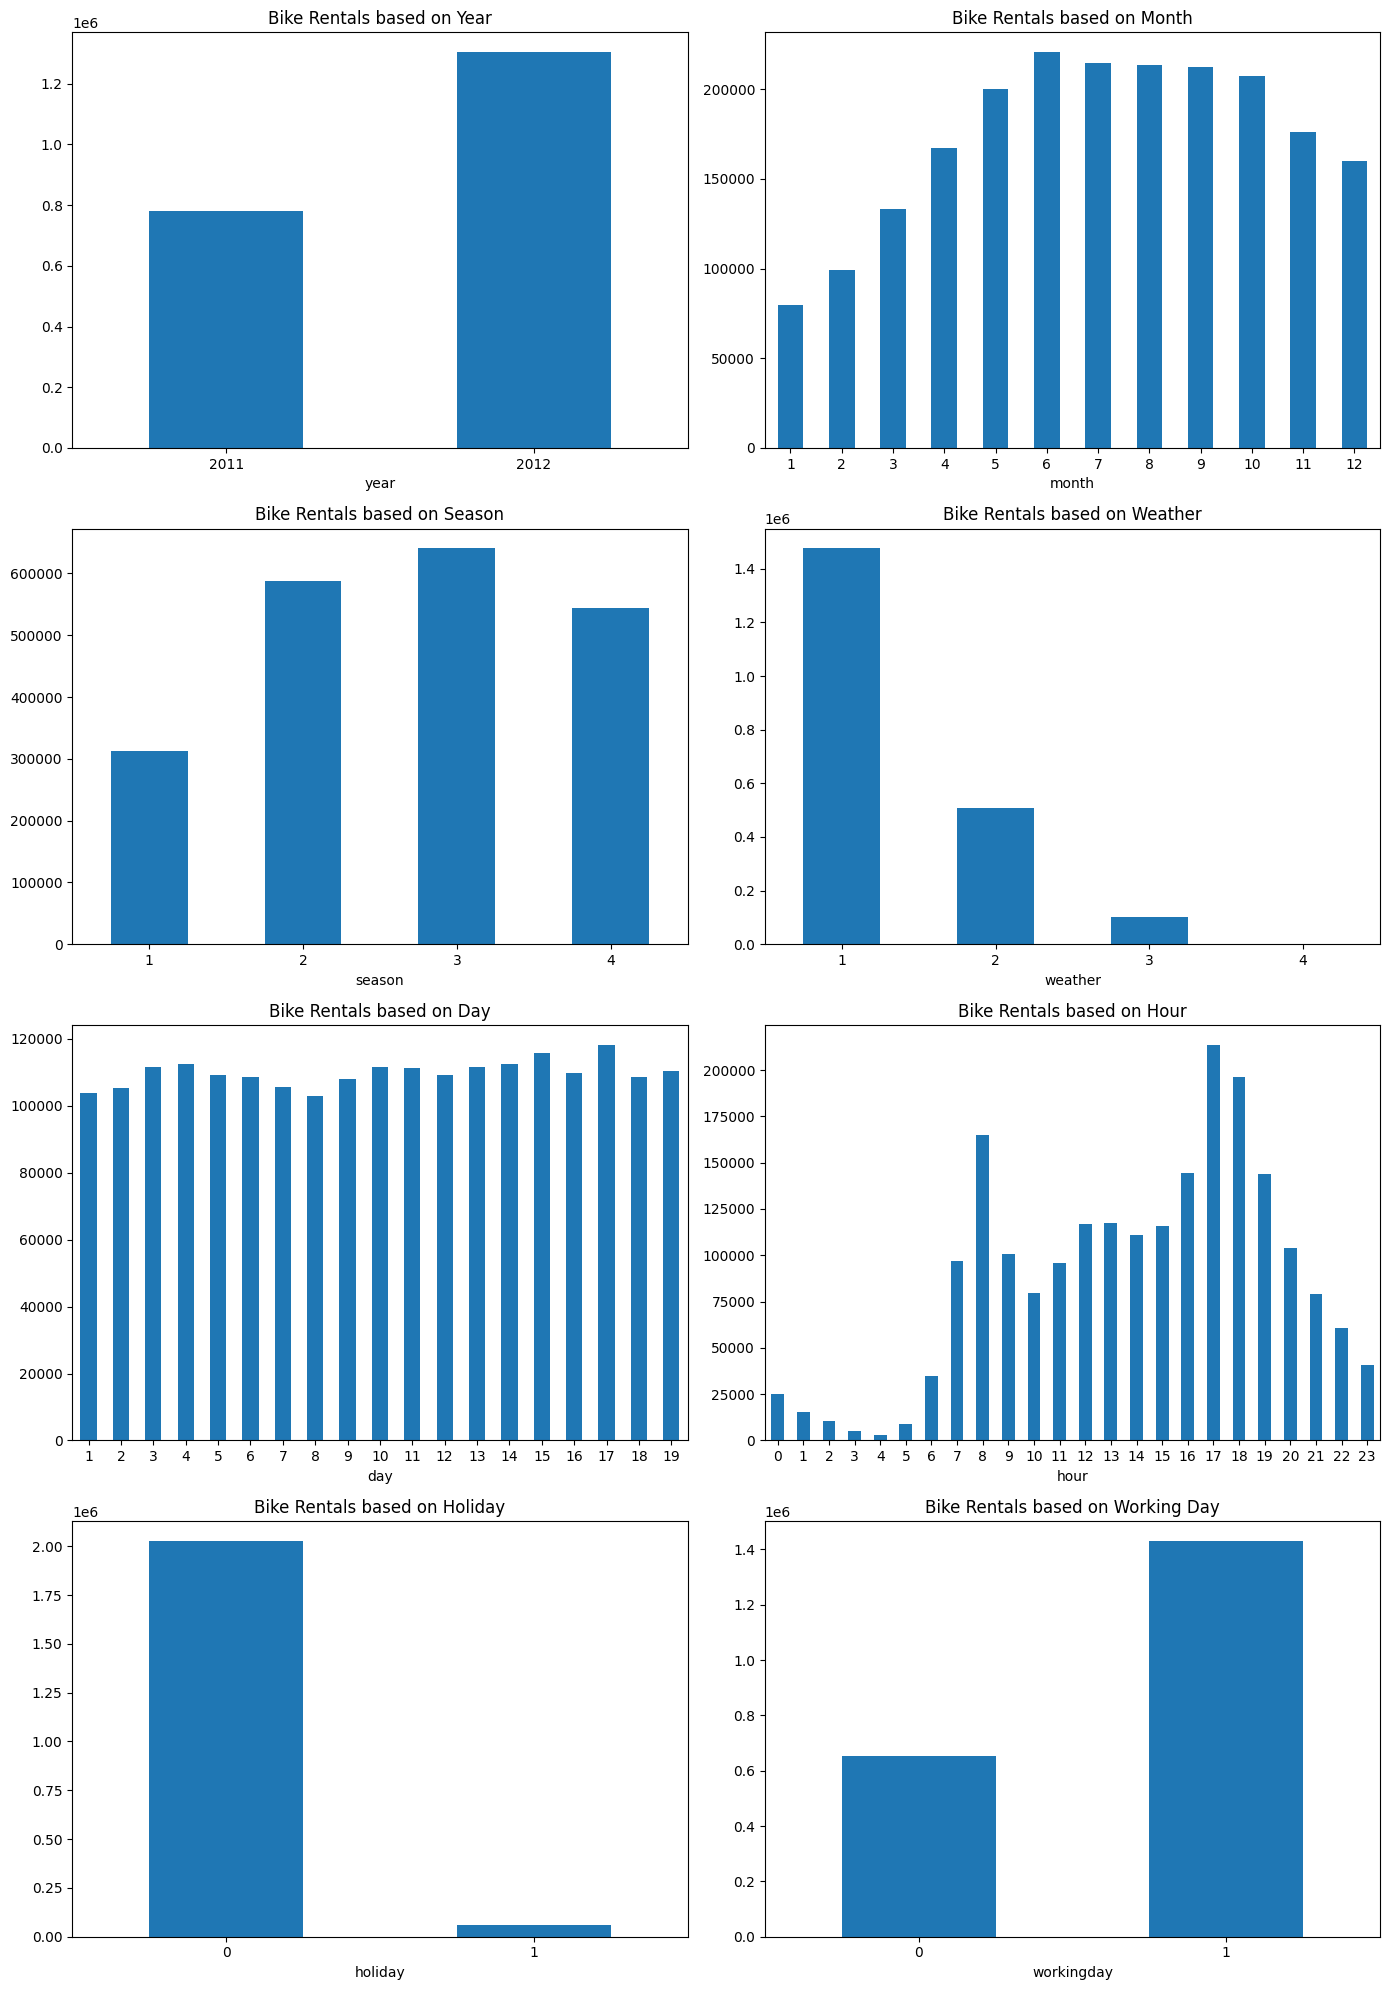

In [34]:
# 막대 그래프(년, 월, 시즌, 날씨, 일, 시간, 휴일, 근무일)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

# Plot
bike_df.groupby('year')['count'].sum().plot(ax=axes[0,0], kind='bar', title='Bike Rentals based on Year', rot=0)
bike_df.groupby('month')['count'].sum().plot(ax=axes[0,1], kind='bar', title='Bike Rentals based on Month', rot=0)
bike_df.groupby('season')['count'].sum().plot(ax=axes[1,0], kind='bar', title='Bike Rentals based on Season', rot=0)
bike_df.groupby('weather')['count'].sum().plot(ax=axes[1,1], kind='bar', title='Bike Rentals based on Weather', rot=0)
bike_df.groupby('day')['count'].sum().plot(ax=axes[2,0], kind='bar', title='Bike Rentals based on Day', rot=0)
bike_df.groupby('hour')['count'].sum().plot(ax=axes[2,1], kind='bar', title='Bike Rentals based on Hour', rot=0)
bike_df.groupby('holiday')['count'].sum().plot(ax=axes[3,0], kind='bar', title='Bike Rentals based on Holiday', rot=0)
bike_df.groupby('workingday')['count'].sum().plot(ax=axes[3,1], kind='bar', title='Bike Rentals based on Working Day', rot=0)

plt.tight_layout()
plt.show()

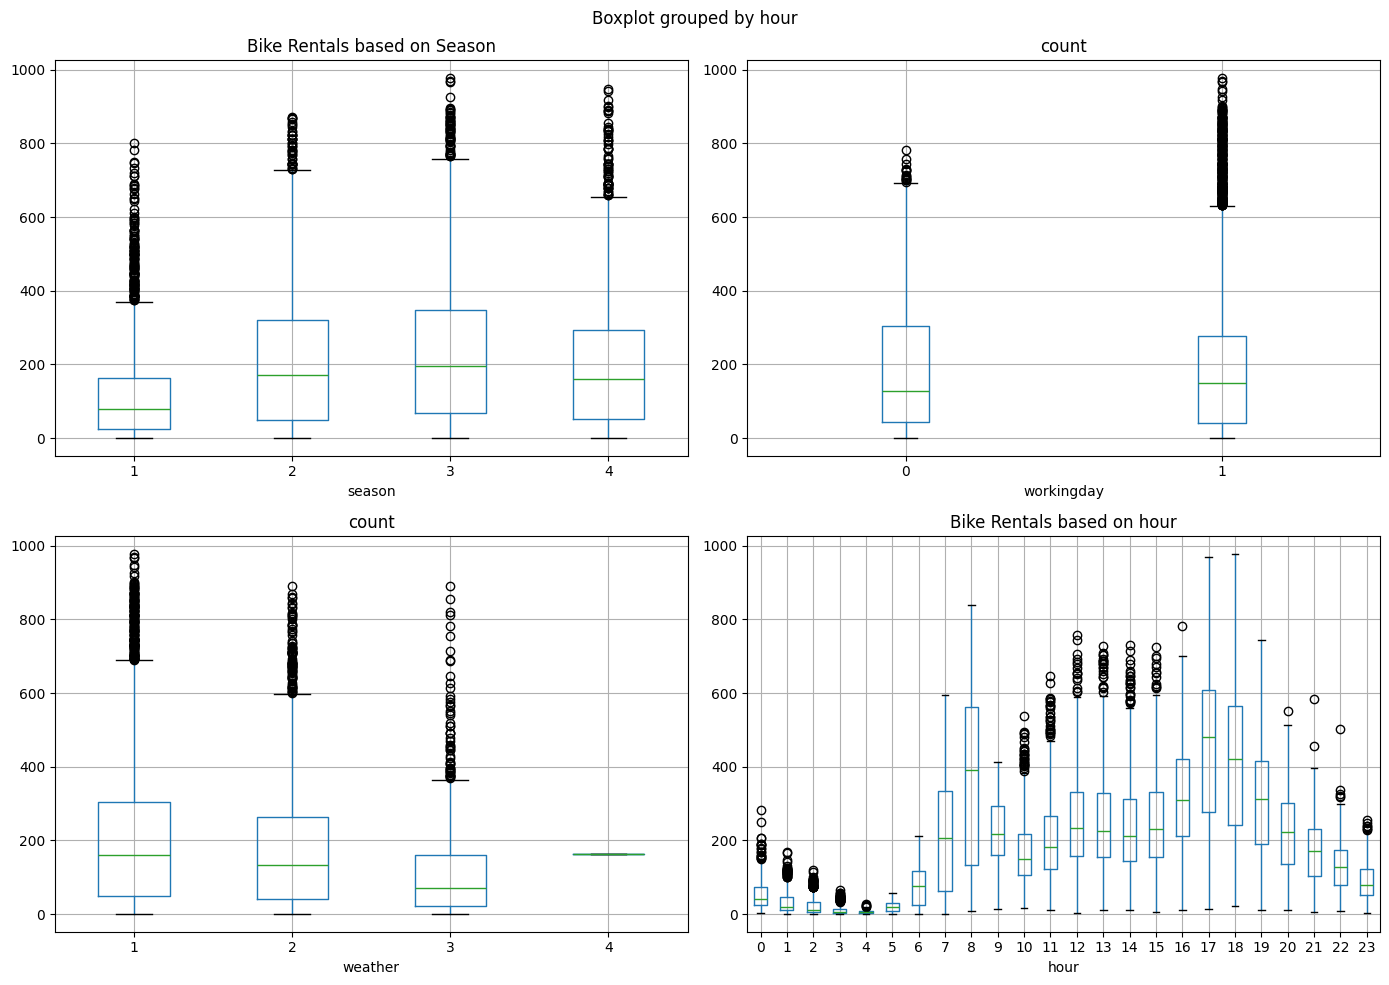

In [35]:
# 박스플롯(시즌, 근무일, 날씨, 시간)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot
bike_df.boxplot(column='count', by='season', ax=axes[0,0])
axes[0,0].set_title('Bike Rentals based on Season')

bike_df.boxplot(column='count', by='workingday', ax=axes[0,1])
axes[1,0].set_title('Bike Rentals based on Working Day')

bike_df.boxplot(column='count', by='weather', ax=axes[1,0])
axes[1,1].set_title('Bike Rentals based on Weather')

bike_df.boxplot(column='count', by='hour', ax=axes[1,1])
axes[1,1].set_title('Bike Rentals based on hour')

plt.tight_layout()
plt.show()

<Axes: xlabel='hour', ylabel='count'>

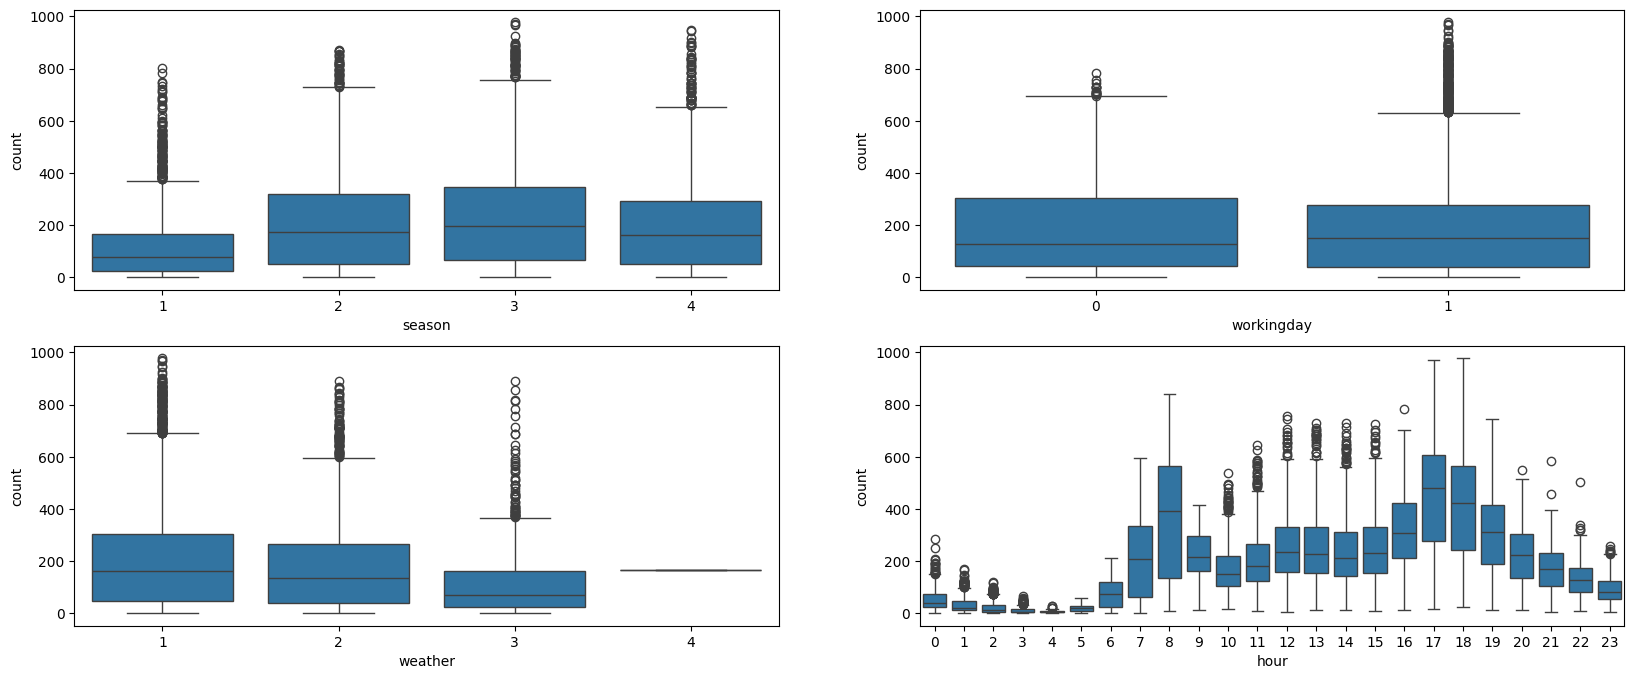

In [36]:
# 박스플롯(시즌, 근무일, 날씨, 시간)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

sns.boxplot(data=bike_df, x="season", y="count", ax=axes[0][0])
sns.boxplot(data=bike_df, x="workingday", y="count", ax=axes[0][1])
sns.boxplot(data=bike_df, x = 'weather', orient="v", y="count", ax=axes[1][0])
sns.boxplot(data=bike_df, x="hour", y="count", ax=axes[1][1])

<Axes: xlabel='hour', ylabel='count'>

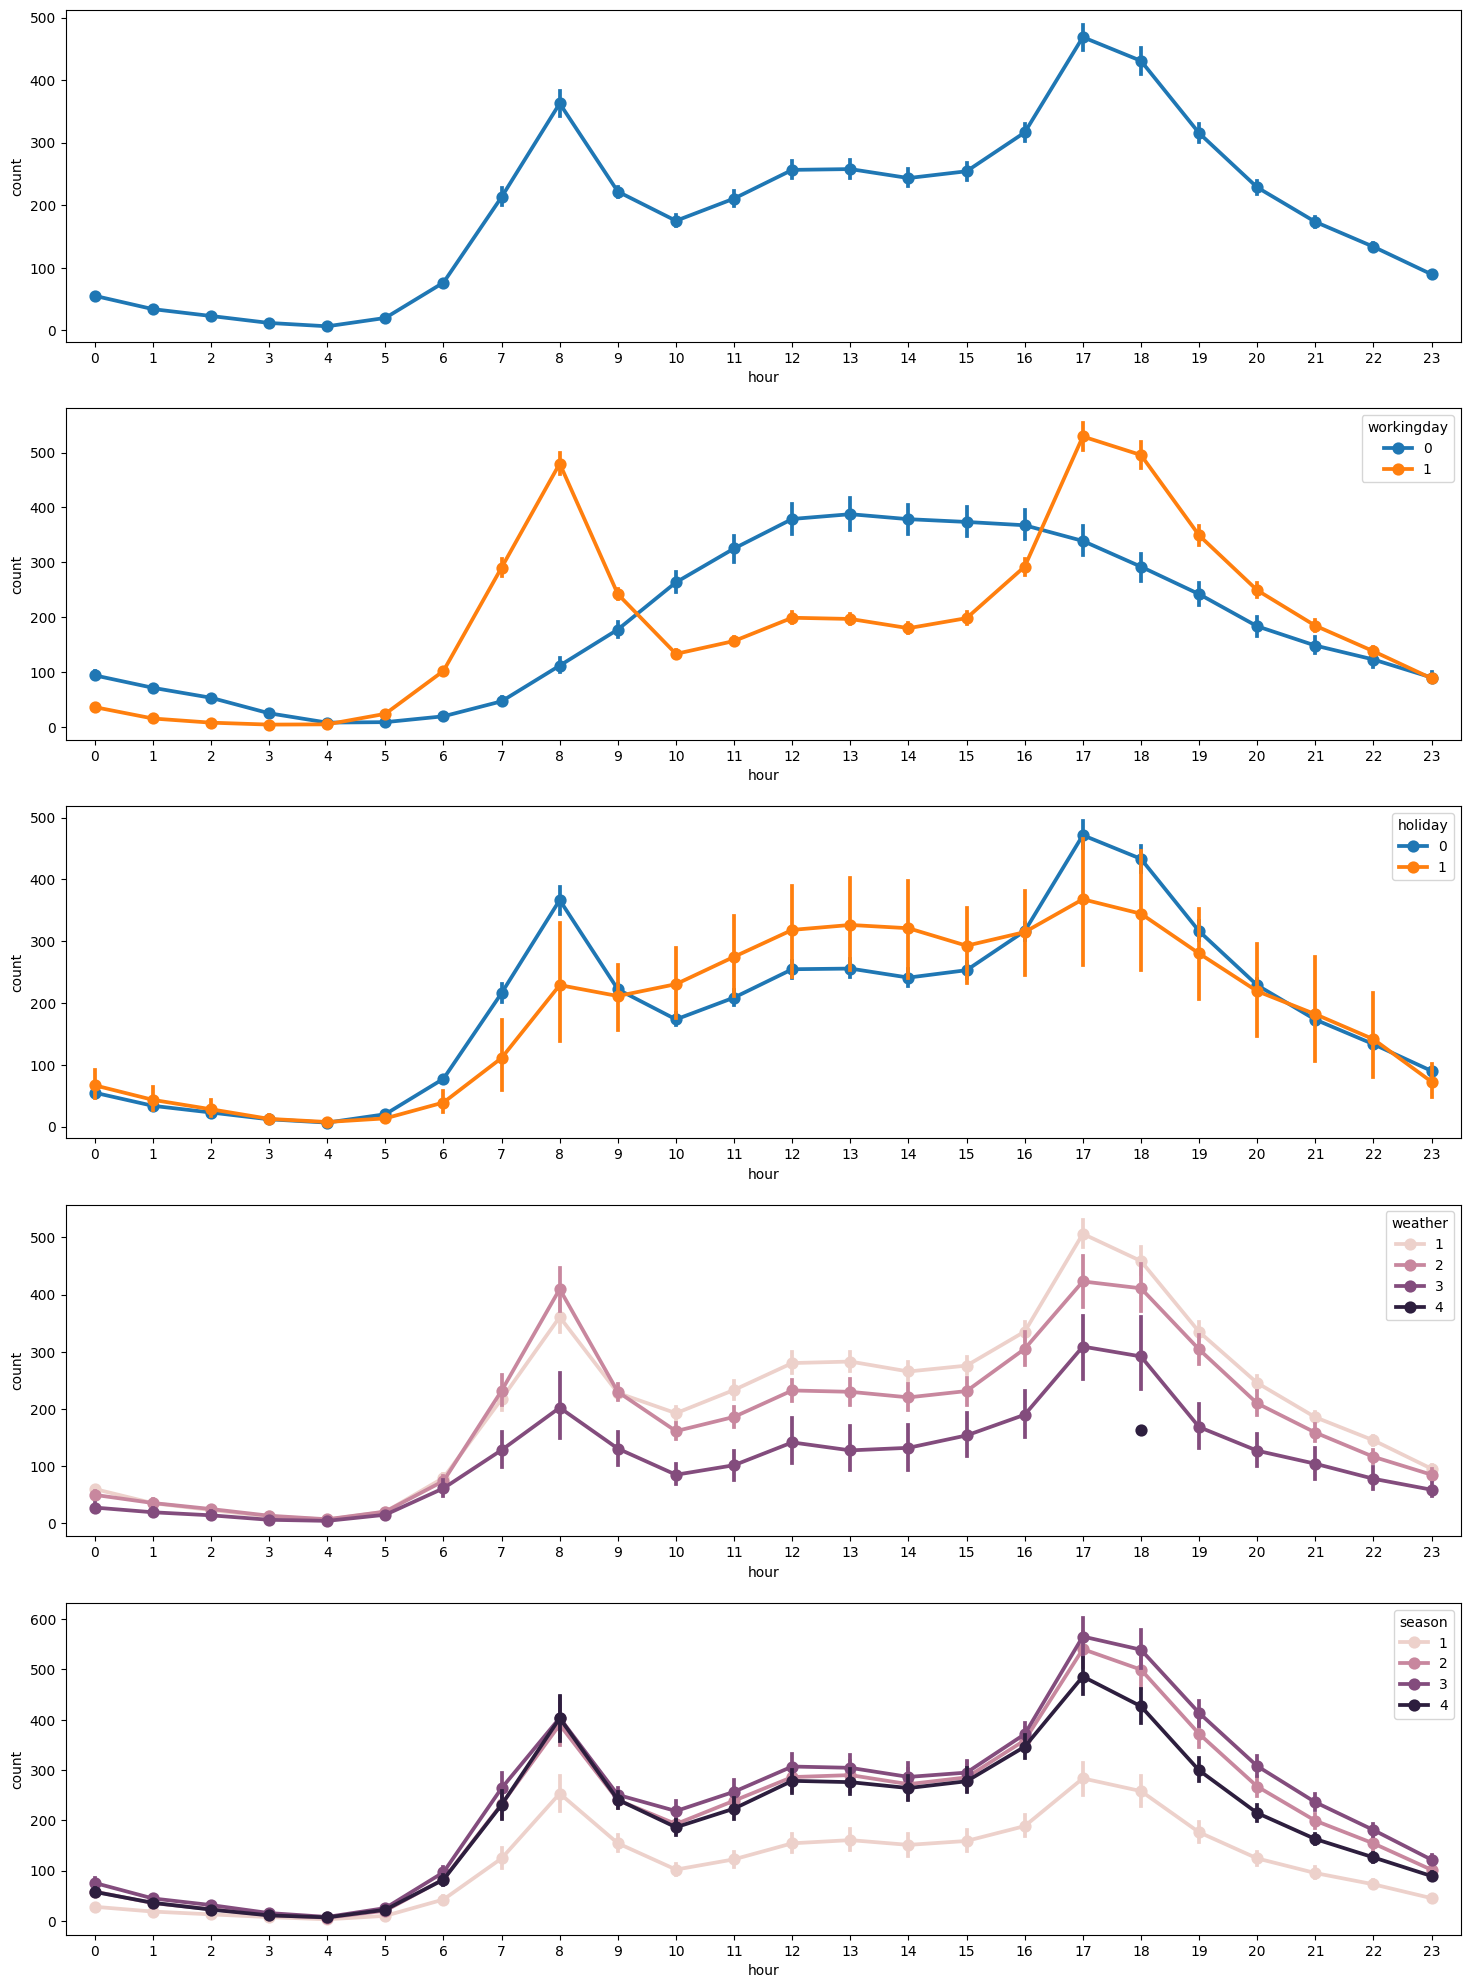

In [37]:
# 포인트 플롯(한 와면에 여러 그래프를 그려 서로 비교)
# 시간별 대여량
# 시간별 대여량 / 근무일구분
# 시간별 대여량 / 휴일구분
# 시간별 대여량 / 날씨구분
# 시간별 대여량 / 계절구분
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=bike_df, x="hour", y="count", ax=ax1)
# x, y, hue names of variables in data or vector data, optional
sns.pointplot(data=bike_df, x="hour", y="count",hue='workingday' ,ax=ax2)
sns.pointplot(data=bike_df, x="hour", y="count",hue='holiday' ,ax=ax3)
sns.pointplot(data=bike_df, x="hour", y="count",hue='weather' ,ax=ax4)
sns.pointplot(data=bike_df, x="hour", y="count",hue='season' ,ax=ax5)

In [38]:
# 판다스의 crosstab 함수 : 'season’과 ‘month’ 두 가지 요인에 대한 간단한 교차표를 계산
pd.crosstab(bike_df['season'], bike_df['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


In [39]:
# 회귀선을 포함한 산점도 그래프
# 온도, 체감온도, 풍속, 습도 별 대여량 산점도 그래프 

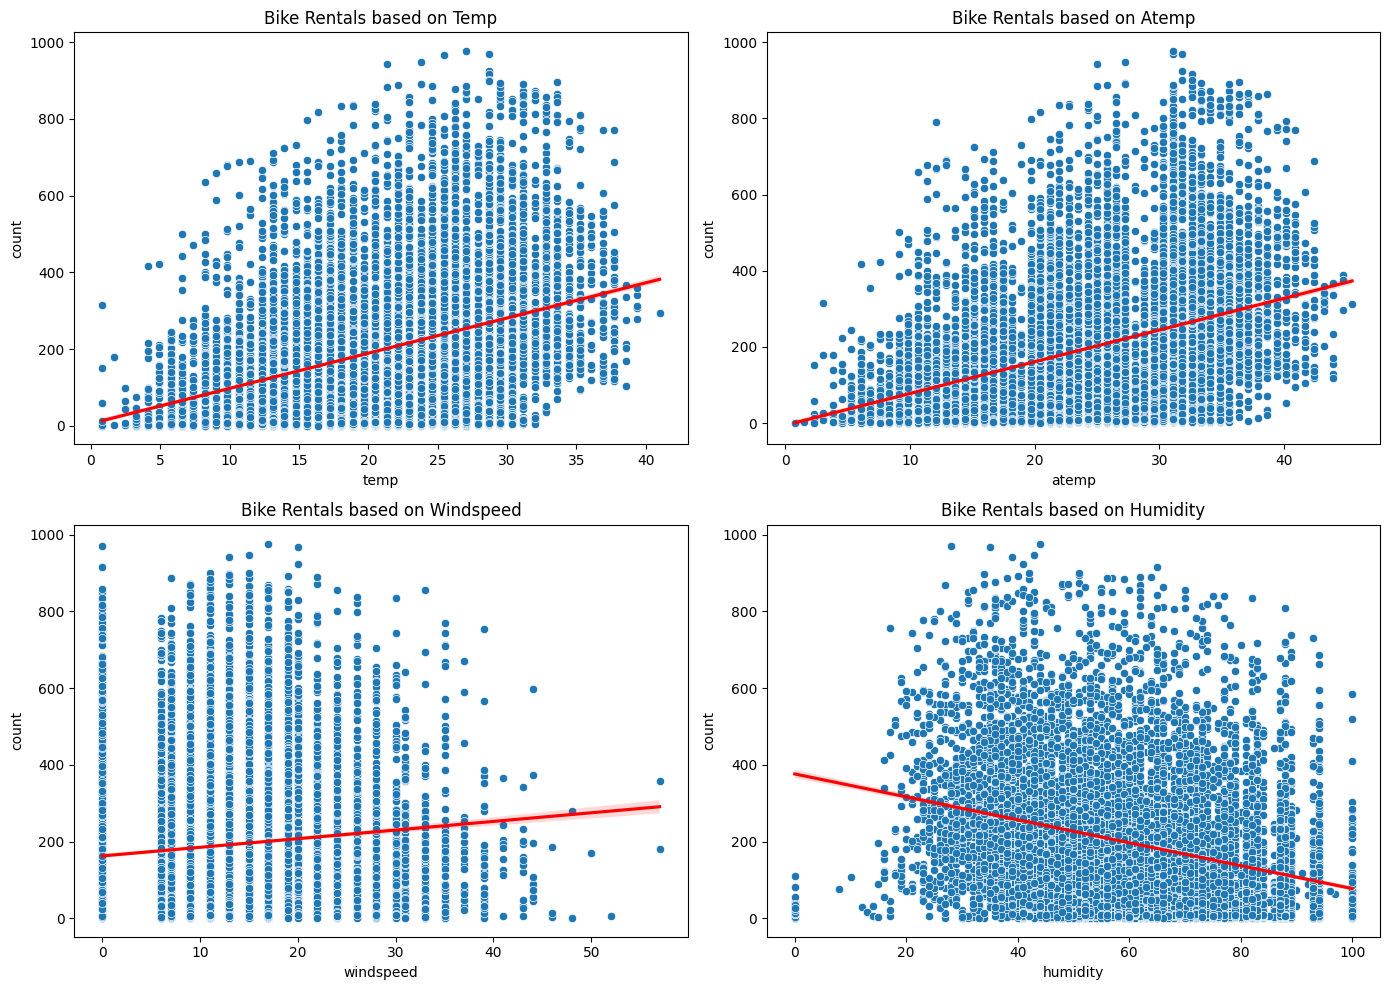

In [40]:
# Create a list of features
features = ['temp', 'atemp', 'windspeed', 'humidity']

# Create a figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.scatterplot(data=bike_df, x=feature, y='count', ax=axes[i])
    sns.regplot(data=bike_df, x=feature, y='count', ax=axes[i], scatter=False, color='red')
    axes[i].set_title(f'Bike Rentals based on {feature.capitalize()}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [41]:
# 성능평가함수 정의

from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [42]:
# 모델 평가하기

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred) # 테스트 실제값, 테스트 예측값

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [43]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

# 만들어진 모델을 가지고 실제 대여횟수와 예측값을 비교
get_top_error_data(y_test,pred,n_tops=10)

      real_count  predicted_count   diff
1618         890            322.0  568.0
966          884            327.0  557.0
3151         798            241.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0
2277         813            267.0  546.0
2314         766            222.0  544.0
454          721            177.0  544.0
1003         713            171.0  542.0
2394         684            142.0  542.0


<Axes: >

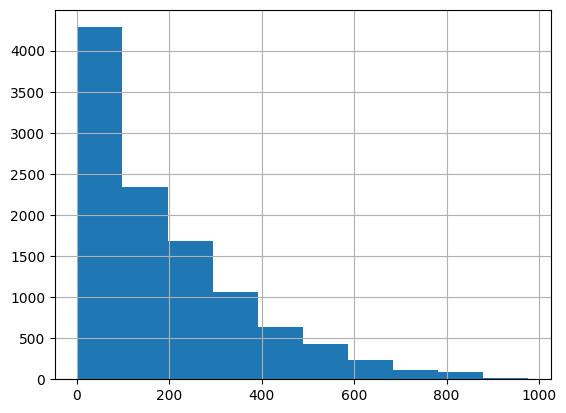

In [44]:
# 타깃 데이터의 분포 확인
# TODO :YOUR_CODE_HERE 
y_target.hist()

<Axes: >

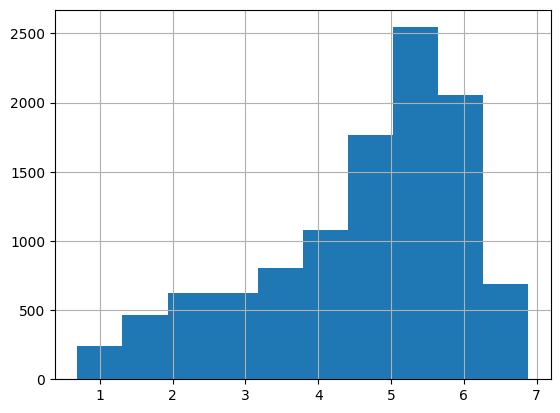

In [45]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [46]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환한 후에 다시 평가 수행
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


In [47]:
# RMSLE: 1.165, RMSE: 140.900, MAE: 105.924 엇 더 안좋아졌다!

<Axes: ylabel='None'>

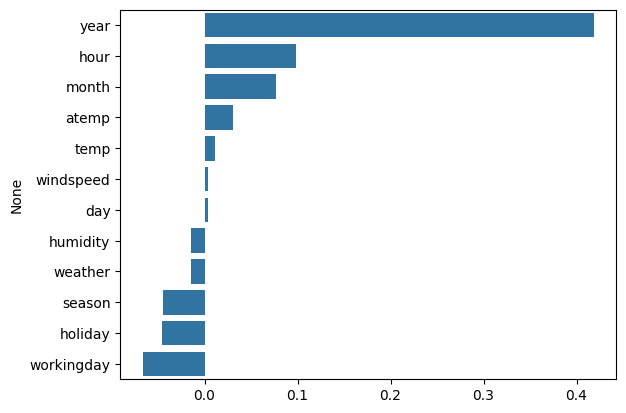

In [48]:
# 각 피처별 회귀계수 값 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)


# 결과 보면 년도라는 값이 엄청난 영향을 미치게 된다? 처리를 해줘야 한다.

In [49]:
# 원핫인코딩

In [50]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [51]:
X_features_ohe.head()
# 컬럼은 많아졌지만 숫자에 대한 중요도가 적어짐

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,9.02,13.635,80,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,9.84,14.395,75,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,9.84,14.395,75,0.0,True,False,True,False,False,False,...,True,False,True,False,False,False,True,False,False,False


In [52]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    print('--------------------------------------')
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
--------------------------------------
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
--------------------------------------
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803
--------------------------------------


<Axes: ylabel='None'>

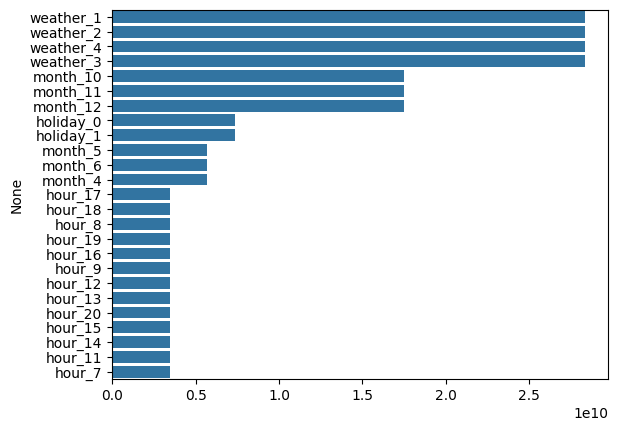

In [53]:
# 어떤 피처가 예측 결과에 큰 영향을 주는지 계수 값이 큰 피처 상위 25개를 선별하여 시각화
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [54]:
# 회귀 트리 모델

In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.282, MAE: 31.147
--------------------------------------
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.326, MAE: 32.742
--------------------------------------
### XGBRegressor ###
RMSLE: 0.339, RMSE: 51.475, MAE: 31.357
--------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
--------------------------------------
